In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 전처리

In [2]:
import pandas as pd

train=pd.read_csv("/content/drive/MyDrive/데이터/데이콘/와인분류/train.csv")
test=pd.read_csv("/content/drive/MyDrive/데이터/데이콘/와인분류/test.csv")
smpl_sub = pd.read_csv('/content/drive/MyDrive/데이터/데이콘/와인분류/sample_submission.csv')

In [3]:
train= train.drop('index', axis=1)

In [4]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [17]:
train['quality'].value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

In [5]:
test = test.drop('index',axis=1)

In [6]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [7]:
smpl_sub.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


### type변수 라벨 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train["type"])
train["type"] = le.transform(train["type"])

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(test["type"])
test["type"] = le.transform(test["type"])

### 품질을 3개의 범주로 재분류

하면 안됨.

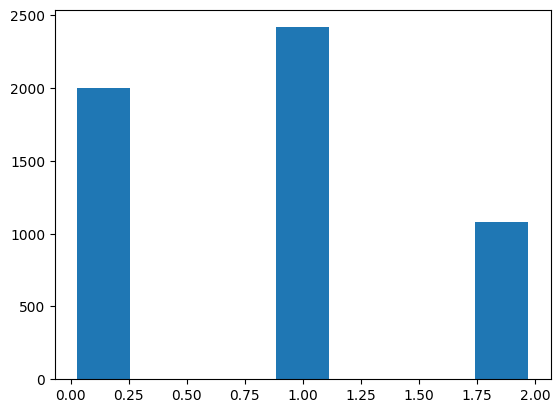

In [8]:
# 품질을 3 개의 범주(좋음, 보통, 나쁨)로 재분류
train.loc[train['quality'] <= 5, 'new_quality'] = 0
train.loc[train['quality'] == 6, 'new_quality'] = 1
train.loc[train['quality'] >= 7, 'new_quality'] = 2
import matplotlib.pyplot as plt
# histogram
plt.hist(train['new_quality'], bins=7, rwidth=0.8)
plt.show()

In [9]:
train = train.drop("quality", axis=1)

In [11]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,0.0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,0.0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,0.0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1,1.0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1,1.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5497 non-null   float64
 1   volatile acidity      5497 non-null   float64
 2   citric acid           5497 non-null   float64
 3   residual sugar        5497 non-null   float64
 4   chlorides             5497 non-null   float64
 5   free sulfur dioxide   5497 non-null   float64
 6   total sulfur dioxide  5497 non-null   float64
 7   density               5497 non-null   float64
 8   pH                    5497 non-null   float64
 9   sulphates             5497 non-null   float64
 10  alcohol               5497 non-null   float64
 11  type                  5497 non-null   int64  
 12  new_quality           5497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 558.4 KB


In [13]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


### X, y 지정

In [34]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [35]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [11]:
X= train.iloc[:,1:]
y= train.iloc[:,0]

### 교차검증 수행

## 랜덤포레스트

In [12]:
# Stratified Kfold 교차검증 이용
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_clf = RandomForestClassifier(min_samples_leaf=1,min_samples_split=2, n_estimators=300, random_state=0)

scores= cross_val_score(rf_clf,X,y,scoring='accuracy',cv=5)
print('교차 검증별 정확도 : {}'.format(np.round(scores,4)))
print('평균 정확도: ', np.mean(scores))

교차 검증별 정확도 : [0.6927 0.6827 0.6733 0.6715 0.6688]
평균 정확도:  0.6778206634130202


## LGBM

In [13]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(n_estimators=200,learning_rate=0.1,num_leaves=64, random_state=42)
scores= cross_val_score(lgbm,X,y,scoring='accuracy',cv=5)
print('교차 검증별 정확도 : {}'.format(np.round(scores,4)))
print('평균 정확도: ', np.mean(scores))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1484
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.391465
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.821849
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

# AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(ada_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

교차 검증별 정확도 : [0.4582 0.1545 0.4277 0.3585 0.374 ]
평균 정확도:  0.3545745719248904


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(knn_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

교차 검증별 정확도 : [0.4936 0.4655 0.475  0.4804 0.4813]
평균 정확도:  0.47917032012573413


# SVM

In [40]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(svc_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

교차 검증별 정확도 : [0.4382 0.43   0.4395 0.4368 0.444 ]
평균 정확도:  0.43769459839523533


# DT

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=0)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(dt_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

교차 검증별 정확도 : [0.5445 0.5245 0.5405 0.525  0.5287]
평균 정확도:  0.5326534866407477


랜덤포레스트가 가장 성능이 좋고, 그 다음으로 LGBM이 성능이 좋다.

# 앙상블

### 스태킹앙상블

In [45]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# 데이터 로드
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

# 개별 모델 설정
estimators = [
    ('rf', RandomForestClassifier(min_samples_leaf=1,min_samples_split=2, n_estimators=300, random_state=0)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=0)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=0))
]

# StackingClassifier 설정
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(stacking_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

교차 검증별 정확도 : [0.6973 0.6982 0.6679 0.6697 0.6697]
평균 정확도:  0.6805467780627016


스태킹 앙상블을 진행하니 모델 예측 성능이 소폭 상승한다. 

이를 바탕으로 하이퍼 파라미터 튜닝을 진행한다. 

In [50]:
# 하이퍼파라미터 튜닝
estimators = [
    ('rf', RandomForestClassifier(min_samples_leaf=1,min_samples_split=2, n_estimators=300, random_state=0)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=0)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=0))
]

# StackingClassifier 설정
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(stacking_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

교차 검증별 정확도 : [0.6982 0.6927 0.6742 0.6679 0.6761]
평균 정확도:  0.6818214906112996


In [51]:
# 하이퍼파라미터 튜닝
estimators = [
    ('rf', RandomForestClassifier(min_samples_leaf=1,min_samples_split=2, n_estimators=300, random_state=0)),
    ('gb', GradientBoostingClassifier(n_estimators=300, random_state=0)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=0))
]

# StackingClassifier 설정
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(stacking_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

교차 검증별 정확도 : [0.7036 0.6927 0.6706 0.6679 0.677 ]
평균 정확도:  0.6823664488377863


제일 정확도가 높아 성능이 가장 좋은 모델이라 판단

### 보팅 앙상블

In [46]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# 데이터 로드
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

# 모델 설정
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
svm_clf = SVC(kernel='rbf', probability=True, random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=5)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('svm', svm_clf),
        ('knn', knn_clf)
    ],
    voting='soft'
)

# Stratified Kfold 교차검증 이용
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차 검증 수행
scores = cross_val_score(voting_clf, X, y, scoring='accuracy', cv=skf)

# 결과 출력
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 정확도: ', np.mean(scores))

교차 검증별 정확도 : [0.6527 0.6509 0.6242 0.6187 0.616 ]
평균 정확도:  0.6325198113987922


# 데이터 출력

In [52]:
# 모델 훈련
stacking_clf.fit(X, y)

# 테스트 데이터에 대해 예측 수행
y_pred = stacking_clf.predict(test)
y_pred = [int(value) for value in y_pred]

# 결과를 DataFrame으로 만들기
result_df = pd.DataFrame({'index': test.index, 'quality': y_pred})

# 결과 확인
result_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6


In [53]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   index    1000 non-null   int64
 1   quality  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [54]:
result_df['quality'].value_counts()

quality
6    490
5    352
7    138
8     12
4      8
Name: count, dtype: int64

In [55]:
result_df.to_csv('sample_submission.csv',index=False)